<a href="https://colab.research.google.com/github/kmalicekim/NLP_practice_mine/blob/master/7_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.2 사이킷런을 미용한 토픽 모델링

### 7.2.1 데이터 준비

In [53]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train= fetch_20newsgroups(subset='train')
newsgroups_train.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [54]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt', 'rec.sport.hockey']

# 학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3819
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'rec.sport.hockey', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [55]:
newsgroups_train.data[:5]

["From: michael@jester.GUN.de (Michael Gerhards)\nDistribution: world\nSubject: Re: HELP: my pc freezes!\nX-Newsreader: TIN [version 1.1 PL8]\nOrganization: private COHERENT system\nLines: 15\n\nPerry Egelmeers (perry@wswiop11.win.tue.nl) wrote:\n> ladanyi@cs.cornell.edu (La'szlo' Lada'nyi) writes:\n\n> >Problem: Occasionaly the machine freezes. At least that's what I thought, but\n> >recently I discovered that the machine works, just the keyboard freezes and\n> >the clock drops down from turbo (33Mhz) to standard (16Mhz) mode.\n\n> Perhaps you hit the ^S (Control S)?  Try ^Q.\n> I know it doesn't explain the clock rate drop...\n\nWe had the same problem in our company. We changed the keyboard-bios and\nafter that, everything went fine. Our dealer told us that some boards of\nthat series have a defect kbd-bios.\n\nMichael\n--\n*  michael@jester.gun.de  *   Michael Gerhards   *   Preussenstrasse 59  *\n                          *  Germany 4040 Neuss  *  Voice: 49 2131 82238 *\n",
 'From

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', 
                     max_features=2500, min_df=5, max_df=0.5)

review_cv = cv.fit_transform(newsgroups_train.data)

print(review_cv[:5])

  (0, 1399)	5
  (0, 983)	2
  (0, 678)	1
  (0, 2467)	1
  (0, 1023)	1
  (0, 1493)	1
  (0, 2272)	1
  (0, 2376)	1
  (0, 1649)	1
  (0, 1731)	1
  (0, 1623)	2
  (0, 2440)	1
  (0, 2306)	1
  (0, 2479)	1
  (0, 1737)	2
  (0, 1314)	2
  (0, 2246)	1
  (0, 2259)	1
  (0, 1840)	1
  (0, 667)	1
  (0, 2465)	1
  (0, 1182)	1
  (0, 439)	2
  (0, 2307)	1
  (0, 2122)	1
  :	:
  (3, 1405)	1
  (3, 1117)	1
  (4, 678)	1
  (4, 1023)	1
  (4, 2343)	1
  (4, 1490)	1
  (4, 2245)	1
  (4, 1501)	1
  (4, 1698)	1
  (4, 1050)	1
  (4, 456)	3
  (4, 1303)	1
  (4, 1296)	1
  (4, 1281)	1
  (4, 1885)	1
  (4, 965)	1
  (4, 2086)	1
  (4, 1906)	1
  (4, 934)	1
  (4, 2424)	1
  (4, 1142)	1
  (4, 1201)	1
  (4, 1481)	1
  (4, 2005)	1
  (4, 663)	1


### 7.2.2 LDA 토픽 모델링 실행

In [57]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np 
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components= 10,   # 추출할 topic의 수 
                                max_iter = 5, # 알고리즘의 최대 반복 횟수
                                topic_word_prior = 0.1, # topic의 사전 단어분포를 결정
                                doc_topic_prior= 1.0,   # 문서의 사전 topic분포를 결정  
                                learning_method='online',  # batch : online에 비해 성능이 더 좋으나 느림
                                n_jobs= -1,  #사용 processor 수(-1: 가능한 모든 프로세서 사용). default는 1
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

print('#shape of review_topics:', review_topics.shape)
print('#sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)  # (topic개수, max_features)


#shape of review_topics: (3819, 10)
#sample of review_topics: [0.042 0.037 0.536 0.021 0.032 0.031 0.02  0.027 0.229 0.026]
#sum of topic weights of documents: [0.097 0.122 0.106 0.132 0.11  0.058 0.088 0.118 0.084 0.085]
#shape of topic word distribution: (10, 2500)


In [58]:
print(review_topics[1][:])

print() 

print(lda.components_[:2])

[0.043 0.125 0.555 0.038 0.049 0.023 0.031 0.086 0.032 0.018]

[[1.029e-01 3.499e-01 1.236e+00 ... 1.004e-01 1.005e-01 1.002e-01]
 [1.005e-01 3.937e+01 2.242e+01 ... 1.043e-01 1.242e+02 7.023e+01]]


In [59]:
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print(f'Topic #{topic_idx}:', end=' ')
    print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1: -1]]))  #slicing에서 맨 뒤 -1은 역순을 의미. 역순으로 했을 때 처음부터 n_top_words까지

  print()

print_top_words(lda, cv.get_feature_names_out(), 13)


Topic #0: key, encryption, clipper, chip, government, use, public, keys, security, privacy, com, law, escrow
Topic #1: com, just, don't, like, article, think, it's, access, people, i'm, going, know, can't
Topic #2: drive, scsi, card, disk, com, controller, ide, bus, hard, use, windows, drives, does
Topic #3: god, people, don't, jesus, say, think, does, believe, christian, bible, just, life, com
Topic #4: team, game, hockey, play, nhl, season, games, year, players, period, pts, new, pittsburgh
Topic #5: article, university, islam, cwru, van, western, com, islamic, book, chi, posting, cal, host
Topic #6: graphics, image, file, available, mail, information, ftp, files, software, data, program, internet, pub
Topic #7: com, university, host, posting, nntp, article, know, distribution, thanks, reply, i'm, need, computer
Topic #8: com, article, jim, brian, question, posting, newsreader, know, time, frank, wrote, org, reply
Topic #9: space, nasa, gov, launch, earth, orbit, moon, satellite, lun

In [60]:
# argsort() 부분 이해를 위해

a = np.array([1.5, 0.2, 4.2, 2.5])
s = a.argsort()

print(s)
print(a[s])

# a는 정렬되지 않은 숫자들의 어레이입니다.
# a.argsort()는 어레이 a를 정렬하는 인덱스의 어레이 [1 0 3 2]를 반환합니다.
# a[s]와 같이 인덱스의 어레이 s를 사용해서 어레이 a를 다시 정렬하면,
# 오름차순으로 정렬된 어레이 [0.2 1.5 2.5 4.2]가 됩니다.

[1 0 3 2]
[0.2 1.5 2.5 4.2]


In [61]:
# ex)
a = np.array([3, 1.3, 5.7, 0.2])

print(a[:-3:-1])
print(a.argsort())
print(a.argsort()[:-3:-1])

[0.2 5.7]
[3 1 0 2]
[2 0]


### 7.2.2 최적의 토픽 수 선택하기

n_components: 6, perplexity: 1216.375
n_components: 7, perplexity: 1215.644
n_components: 8, perplexity: 1224.125
n_components: 9, perplexity: 1208.056
n_components: 10, perplexity: 1181.733
n_components: 11, perplexity: 1176.414
n_components: 12, perplexity: 1188.870
n_components: 13, perplexity: 1188.711
n_components: 14, perplexity: 1171.418
n_components: 15, perplexity: 1176.919


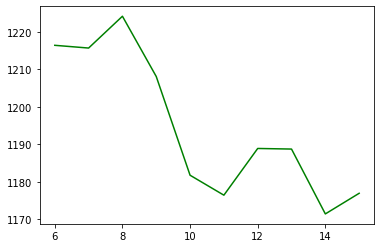

n_components with minimum perplexity: 14


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

# 혼란도 --- 값이 낮을수록 좋음
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,  # max_iter는 최소 5이상의 값을 주는것이 좋음
                    doc_topic_prior=1.0):
  iter_num = []
  per_value = []

  for i in range(start, end+1):
    lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
                                    topic_word_prior = topic_word_prior,
                                    doc_topic_prior=doc_topic_prior,
                                    learning_method='batch', n_jobs= -1,
                                    random_state=7)
    lda.fit(cv)
    iter_num.append(i)
    pv = lda.perplexity(cv) 
    per_value.append(pv)
    print(f'n_components: {i}, perplexity: {pv:.3f}')


  plt.plot(iter_num, per_value, 'g-')
  plt.show()
  return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))
    


In [63]:
lda = LatentDirichletAllocation(n_components=8,  # 추출할 topic의 수 지정
                                max_iter=20, 
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: people, god, don't, think, just, say, does, believe, like, jesus
Topic #1: scsi, hockey, team, nhl, players, ide, game, university, bus, article
Topic #2: space, nasa, drive, gov, launch, access, disk, earth, ___, moon
Topic #3: key, chip, encryption, clipper, com, government, keys, use, security, public
Topic #4: com, article, don't, keith, think, posting, morality, nntp, host, caltech
Topic #5: image, available, file, software, use, data, information, graphics, mail, ftp
Topic #6: com, posting, host, nntp, university, article, know, i'm, thanks, distribution
Topic #7: game, play, period, win, year, power, team, goal, pts, new



## 7.3 Gensim을 이용한 토픽 모델링

### 7.3.1 Gensim 사용법과 시각화

In [64]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
# Gensim은 텍스트에 대한 토큰화 결과를 입력으로 사용함

# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer('[\w]{3,}')  # 정규표현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) # 영어 불용어를 가져옴


def tokenizer(text):
  tokens = RegTok.tokenize(text.lower())
  words = [word for word in tokens if (word not in english_stops) and len(word)>2]
  return words 


texts = [tokenizer(news) for news in newsgroups_train.data]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [68]:
from gensim.corpora.dictionary import Dictionary 

# 토큰화 결과로부터 dictionary 생성 
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

#Number of initial unique words in documents: 49768
